In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


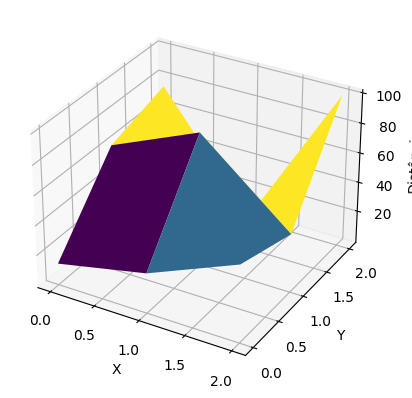

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exemplo de mapa de profundidade
mapa_profundidade = np.array([[0.2, 0.3, 0.5],
                              [0.6, 0.8, 0.4],
                              [0.7, 0.1, 0.9]])

# Normalização
valor_min = np.min(mapa_profundidade)
valor_max = np.max(mapa_profundidade)
mapa_profundidade_normalizado = (mapa_profundidade - valor_min) / (valor_max - valor_min)

# Conversão para distância
distancia = 0.1 + mapa_profundidade_normalizado * (100 - 0.1)

# Criação do mapa 3D
x, y = np.meshgrid(range(mapa_profundidade.shape[1]), range(mapa_profundidade.shape[0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, distancia, cmap='viridis')

# Configurações adicionais
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distância')

# Exibição do mapa 3D
plt.show()

In [ ]:
import cv2
import numpy as np
import glob

pattern_size = (9, 6)

object_points = []
image_points = []

pattern_points = np.zeros((np.prod(pattern_size), 3), dtype=np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)

calibration_images = []

image_dir = "/content/drive/MyDrive/TCC/Images_calibration/"

filename_pattern = image_dir + "IMG*.jpg"

image_files = glob.glob(filename_pattern)

for image_path in image_files:
    frame = cv2.imread(image_path)

    if frame is not None:

        resized_frame = cv2.resize(frame, (640, 480))

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Localização dos cantos do padrão de calibração na imagem
        ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

        if ret:
            object_points.append(pattern_points)
            image_points.append(corners)

            cv2.drawChessboardCorners(frame, pattern_size, corners, ret)
            calibration_images.append(frame)

    print('Deu bom!')


cv2.destroyAllWindows()
ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1], None, None)

print('Parâmetros intrínsecos da câmera:')
print('Matriz de câmera:')
print(camera_matrix)
print('Coeficientes de distorção:')
print(distortion_coeffs)



Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Deu bom!
Parâmetros intrínsecos da câmera:
Matriz de câmera:
[[2.95389836e+03 0.00000000e+00 1.59195353e+03]
 [0.00000000e+00 2.60746459e+03 1.28217291e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Coeficientes de distorção:
[[-0.56239355  0.25599173  0.16078187  0.01695844 -0.17199612]]
